In [153]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [119]:
df = pd.read_csv('C:/Users/Franc/Downloads/Breast_cancer_dataset.csv', sep=',', header=0)
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN
306,89344,B,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,20.45,92.00,636.9,0.1128,0.1346,0.0112,0.0250,0.2651,0.08385,NaN
27,852781,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,...,27.26,139.90,1403.0,0.1338,0.2117,0.3446,0.1490,0.2341,0.07421,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [123]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [125]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,...,10.51,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178
210,881046502,M,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,...,23.24,27.84,158.30,1656.0,0.1178,0.29200,0.38610,0.19200,0.2909,0.05865
211,8810528,B,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,13.30,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
312,89382602,B,12.760,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,...,14.19,16.40,92.04,618.8,0.1194,0.22080,0.17690,0.08411,0.2564,0.08253
331,896864,B,12.980,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.34390,0.09858,0.3596,0.09166


In [127]:
print(df.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [129]:
df.rename(columns={'diagnosis':'Diagnostico',
                        'radius_mean':'Radio',
                        'texture_mean':'Textura',
                        'perimeter_mean':'perimetro',
                        'area_mean':'área',
                        'smoothness_mean':'suavidad',
                        'compactness_mean':'compacticidad',
                        'concavity_mean':'concavidad',
                        'concave points_mean':'puntos concavos',
                        'symmetry_mean':'simetría',
                        'fractal_dimension_mean':'dimensión fractal',
                        'radius_se':'radio_err',
                        'texture_se':'textura_err',
                        'perimeter_se':'perimetro_err',
                        'area_se':'area_err',
                        'smoothness_se':'suavidad_err',
                        'compactness_se':'compacticidad_err',
                        'concavidad_se':'concavidad_err',
                        'concave points_se':'puntos concavos_err',
                        'symmetry_se':'simetría_err',
                        'fractal_dimension_se':'dimensión_fractal_err',
                        'radius_worst':'radio_peor',
                        'texture_worst':'textura_peor',
                        'perimeter_worst':'perimetro_peor',
                        'area_worst':'área_peor',
                        'smoothness_worst':'suavidad_peor',
                        'compactness_worst':'compacticidad_peor',
                        'concavity_worst':'concavidad_peor',
                        'concave points_worst':'puntos concavos_peor',
                        'symmetry_worst':'simetría_peor',
                        'fractal_dimension_worst':'dimensión_fractal_peor'}, inplace=True)
df.sample(5)

,id,Diagnostico,Radio,Textura,perimetro,área,suavidad,compacticidad,concavidad,puntos concavos,...,radio_peor,textura_peor,perimetro_peor,área_peor,suavidad_peor,compacticidad_peor,concavidad_peor,puntos concavos_peor,simetría_peor,dimensión_fractal_peor
227,88147102,B,15.00,15.51,97.45,684.5,0.08371,0.1096,0.06505,0.03780,...,16.41,19.31,114.2,808.2,0.1136,0.3627,0.3402,0.13790,0.2954,0.08362
533,91930402,M,20.47,20.67,134.70,1299.0,0.09156,0.1313,0.15230,0.10150,...,23.23,27.15,152.0,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386
393,903516,M,21.61,22.28,144.40,1407.0,0.11670,0.2087,0.28100,0.15620,...,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.24220,0.3828,0.10070
400,90439701,M,17.91,21.02,124.40,994.0,0.12300,0.2576,0.31890,0.11980,...,20.80,27.78,149.6,1304.0,0.1873,0.5917,0.9034,0.19640,0.3245,0.11980
448,911150,B,14.53,19.34,94.25,659.7,0.08388,0.0780,0.08817,0.02925,...,16.30,28.39,108.1,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463


In [131]:
df.isnull().sum()

id                        0
Diagnostico               0
Radio                     0
Textura                   0
perimetro                 0
área                      0
suavidad                  0
compacticidad             0
concavidad                0
puntos concavos           0
simetría                  0
dimensión fractal         0
radio_err                 0
textura_err               0
perimetro_err             0
area_err                  0
suavidad_err              0
compacticidad_err         0
concavity_se              0
puntos concavos_err       0
simetría_err              0
dimensión_fractal_err     0
radio_peor                0
textura_peor              0
perimetro_peor            0
área_peor                 0
suavidad_peor             0
compacticidad_peor        0
concavidad_peor           0
puntos concavos_peor      0
simetría_peor             0
dimensión_fractal_peor    0
dtype: int64

In [133]:
df['Diagnostico'].value_counts()

Diagnostico
B    357
M    212
Name: count, dtype: int64

In [135]:
df[['Diagnostico']] = df[['Diagnostico']].fillna(0)

In [137]:
df['Diagnostico']=(df['Diagnostico'].apply(lambda row: 1.0 if 'B' in row else 0.0))
df.corr()

,id,Diagnostico,Radio,Textura,perimetro,área,suavidad,compacticidad,concavidad,puntos concavos,...,radio_peor,textura_peor,perimetro_peor,área_peor,suavidad_peor,compacticidad_peor,concavidad_peor,puntos concavos_peor,simetría_peor,dimensión_fractal_peor
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
Diagnostico,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
Radio,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Textura,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimetro,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
área,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
suavidad,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compacticidad,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavidad,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
puntos concavos,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


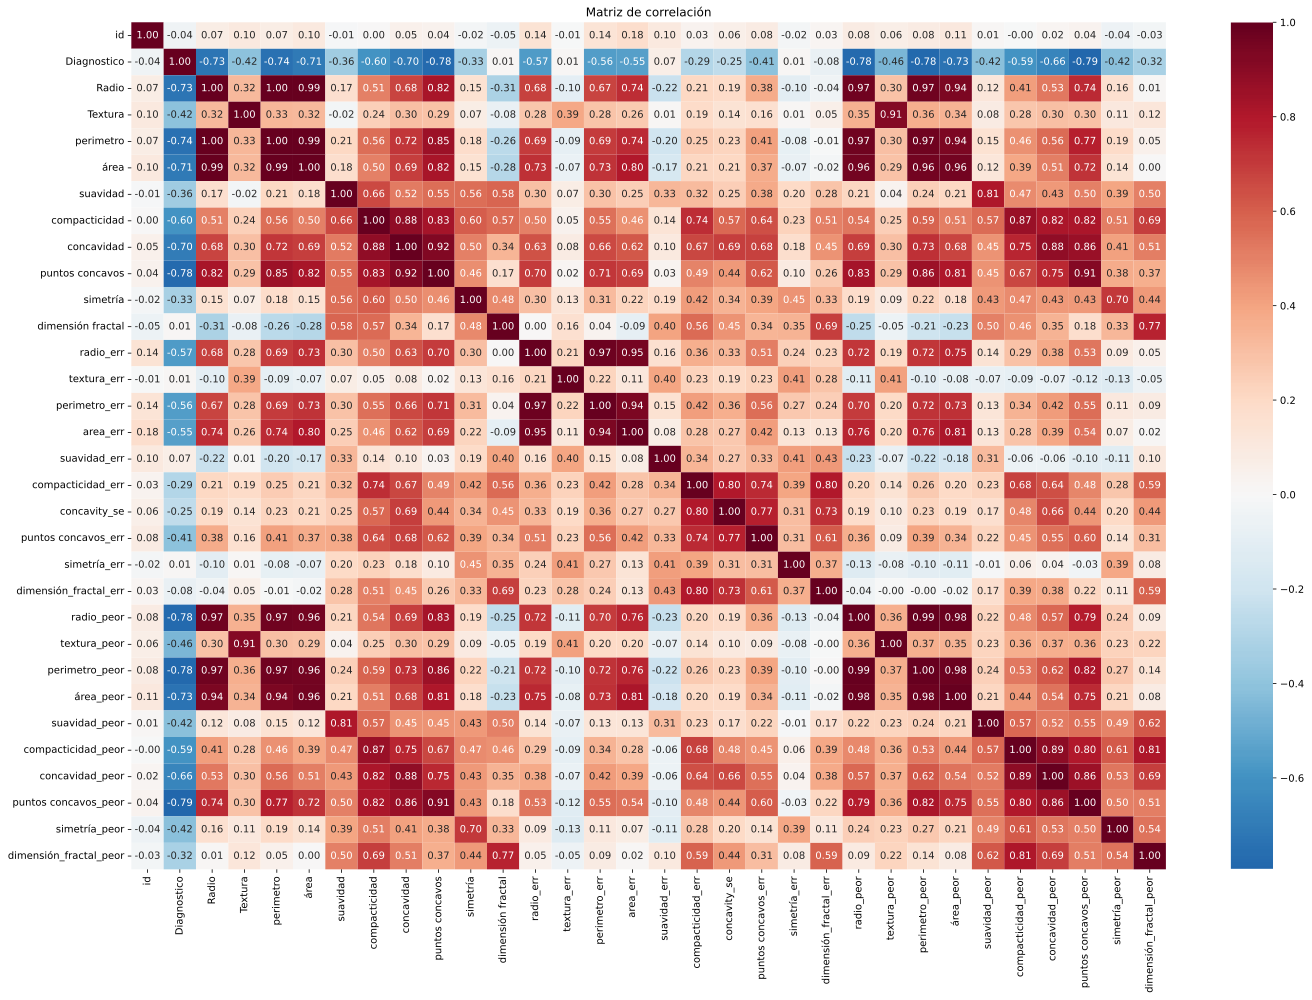

In [139]:
plt.figure(figsize=(20, 14))
sns.heatmap(
    df.corr(),
    annot=True,        
    fmt=".2f",         
    cmap="RdBu_r",     
    center=0           
)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

In [157]:
X = df[['Radio','Textura','perimetro','área','suavidad','compacticidad','concavidad','simetría','dimensión fractal','radio_err','textura_err','perimetro_err','area_err','suavidad_err','compacticidad_err','concavity_se','simetría_err','dimensión_fractal_err','radio_peor','textura_peor','perimetro_peor','área_peor','suavidad_peor','compacticidad_peor','concavidad_peor','simetría_peor','dimensión_fractal_peor']]
y = df['Diagnostico']
smote = SMOTE(random_state=42)
X_resampled, y_resampled =smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Set de prueba {}'.format(y_train.value_counts()))
print('Set de test {}'.format(y_test.value_counts()))

Set de prueba Diagnostico
1.0    288
0.0    283
Name: count, dtype: int64
Set de test Diagnostico
0.0    74
1.0    69
Name: count, dtype: int64


In [151]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)       

print("Mejores parametros:", study.best_params)
print("F1:", study.best_value)

[I 2025-08-04 20:54:52,554] A new study created in memory with name: no-name-0a1652cb-1dd6-4789-82c1-5b2ee79d575b
[I 2025-08-04 20:54:54,095] Trial 0 finished with value: 0.9491929341846114 and parameters: {'n_estimators': 86, 'max_depth': 28, 'min_samples_split': 7}. Best is trial 0 with value: 0.9491929341846114.
[I 2025-08-04 20:54:56,674] Trial 1 finished with value: 0.9474408336472924 and parameters: {'n_estimators': 143, 'max_depth': 19, 'min_samples_split': 10}. Best is trial 0 with value: 0.9491929341846114.
[I 2025-08-04 20:54:57,861] Trial 2 finished with value: 0.9509506751171122 and parameters: {'n_estimators': 76, 'max_depth': 22, 'min_samples_split': 6}. Best is trial 2 with value: 0.9509506751171122.
[I 2025-08-04 20:54:58,614] Trial 3 finished with value: 0.9492015848591939 and parameters: {'n_estimators': 45, 'max_depth': 22, 'min_samples_split': 8}. Best is trial 2 with value: 0.9509506751171122.
[I 2025-08-04 20:54:59,481] Trial 4 finished with value: 0.9474379294838

Mejores parametros: {'n_estimators': 139, 'max_depth': 15, 'min_samples_split': 5}
F1: 0.9544563353990663


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        74
         1.0       0.99      1.00      0.99        69

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



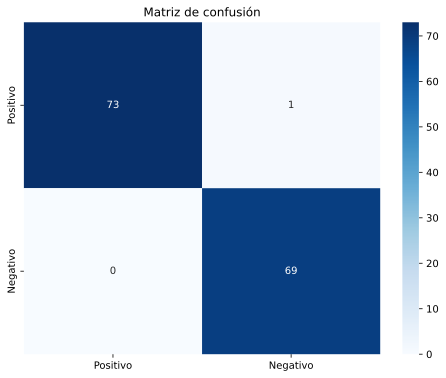

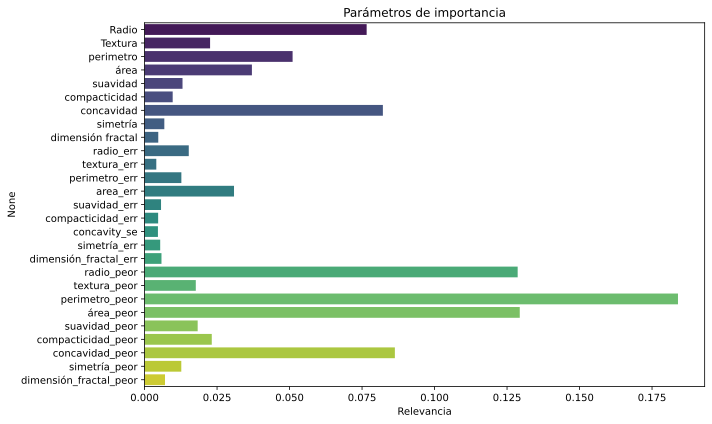

In [155]:
best_rf_params = study.best_params
best_rf_params.update({'random_state': 42, 'n_jobs': -1})

rf_model = RandomForestClassifier(**best_rf_params)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  

print("Classification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'])
plt.title('Matriz de confusión')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X_train.columns, palette='viridis')
plt.title('Parámetros de importancia')
plt.xlabel('Relevancia')
plt.tight_layout()
plt.show()